In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.datasets import mnist
# mnist contains 60,000 training data and 10,000 testing data of hand-writing number


def plot_image(image):
    fig = plt.gcf()  # Initialize
    fig.set_size_inches(10, 10)
    plt.imshow(image, cmap='binary')
    plt.show()


def plot_images_labels_prediction(images, labels, prediction, index, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    num = 25 if num > 25 else num
    for i in range(0, num):
        ax = plt.subplot(5, 5, 1+i)
        ax.imshow(images[index], cmap='binary')
        title = "label = " + str(images[index])
        title += ", prediction = " + str(prediction[index]) if len(prediction) > 0 else ""
        ax.set_title(title, fontsize=10)
        ax.set_xticks([])
        ax.set_yticks([])
        index += 1
    plt.show()


# Return 4 arrays
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# 28x28 -> 784x1
X_train_reshaped = X_train.reshape(60000, 784).astype('float32')
X_test_reshaped = X_test.reshape(10000, 784).astype('float32')

# Normalize, convert 0~255 to 0~1
X_train_normalized = X_train_reshaped / 255
X_test_normalized = X_test_reshaped / 255

# Convert labels to one-hot encoding
y_train_one_hot = np_utils.to_categorical(y_train)
y_test_one_hot = np_utils.to_categorical(y_test)

print(len(X_train))
print(len(X_test))
print(len(X_train.shape))  # 60000x28x28
print(len(X_test.shape))  # 10000x28x28

# plot_image(X_train[5])
# print(y_train[5])

# plot_images_labels_prediction(X_train, y_train, [], 0, 10)



60000
10000
3
3


In [34]:
# Visualize training process
import matplotlib.pyplot as plt
def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train history')
    plt.ylabel(train)
    plt.xlabel('epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

## Build a multilayer perceptron model 

In [35]:
from keras.models import Sequential
from keras.layers import Dense

In [36]:
model = Sequential()
# Add layers
model.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [37]:
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dense_18 (Dense)             (None, 10)                10010     
Total params: 795,010
Trainable params: 795,010
Non-trainable params: 0
_________________________________________________________________
None


In [38]:
# Model settings (784 -> 1000 -> 10)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history = model.fit(x=X_train_normalized, 
                          y=y_train_one_hot, 
                          validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
6s - loss: 0.2914 - acc: 0.9160 - val_loss: 0.1464 - val_acc: 0.9581
Epoch 2/10
6s - loss: 0.1161 - acc: 0.9670 - val_loss: 0.1032 - val_acc: 0.9698
Epoch 3/10
6s - loss: 0.0747 - acc: 0.9786 - val_loss: 0.0870 - val_acc: 0.9738
Epoch 4/10
6s - loss: 0.0503 - acc: 0.9863 - val_loss: 0.0843 - val_acc: 0.9745
Epoch 5/10
6s - loss: 0.0358 - acc: 0.9903 - val_loss: 0.0801 - val_acc: 0.9763
Epoch 6/10
6s - loss: 0.0254 - acc: 0.9935 - val_loss: 0.0725 - val_acc: 0.9769
Epoch 7/10
6s - loss: 0.0189 - acc: 0.9956 - val_loss: 0.0771 - val_acc: 0.9758
Epoch 8/10
6s - loss: 0.0139 - acc: 0.9969 - val_loss: 0.0769 - val_acc: 0.9776
Epoch 9/10
6s - loss: 0.0094 - acc: 0.9982 - val_loss: 0.0736 - val_acc: 0.9798
Epoch 10/10
6s - loss: 0.0064 - acc: 0.9991 - val_loss: 0.0704 - val_acc: 0.9808


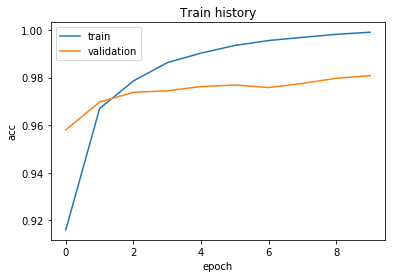

In [39]:
# Overfitting
show_train_history(train_history,'acc','val_acc')

## Add Dropout

In [40]:
from keras.layers import Dropout

model_dropout = Sequential()
# Add layers
model_dropout.add(Dense(units=1000, input_dim=784, kernel_initializer='normal', activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(units=1000, kernel_initializer='normal', activation='relu'))
model_dropout.add(Dropout(0.5))
model_dropout.add(Dense(units=10, kernel_initializer='normal', activation='softmax'))

In [43]:
model_dropout.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_19 (Dense)             (None, 1000)              785000    
_________________________________________________________________
dropout_9 (Dropout)          (None, 1000)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_10 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_21 (Dense)             (None, 1000)              1001000   
_________________________________________________________________
dropout_11 (Dropout)         (None, 1000)              0         
_________________________________________________________________
dense_22 (Dense)             (None, 1000)              1001000   
__________

In [44]:
# Model settings (784 -> 1000 -> 10)
model_dropout.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
train_history_dropout = model_dropout.fit(x=X_train_normalized, 
                          y=y_train_one_hot, 
                          validation_split=0.2, epochs=10, batch_size=200, verbose=2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
35s - loss: 0.2396 - acc: 0.9295 - val_loss: 0.1185 - val_acc: 0.9654
Epoch 2/10
34s - loss: 0.1801 - acc: 0.9488 - val_loss: 0.1137 - val_acc: 0.9687
Epoch 3/10
34s - loss: 0.1525 - acc: 0.9573 - val_loss: 0.0958 - val_acc: 0.9731
Epoch 4/10
34s - loss: 0.1320 - acc: 0.9627 - val_loss: 0.0939 - val_acc: 0.9740
Epoch 5/10
34s - loss: 0.1252 - acc: 0.9652 - val_loss: 0.0913 - val_acc: 0.9745
Epoch 6/10
34s - loss: 0.1124 - acc: 0.9687 - val_loss: 0.0891 - val_acc: 0.9757
Epoch 7/10
33s - loss: 0.1035 - acc: 0.9698 - val_loss: 0.0949 - val_acc: 0.9735
Epoch 8/10
35s - loss: 0.0940 - acc: 0.9740 - val_loss: 0.0828 - val_acc: 0.9780
Epoch 9/10
36s - loss: 0.0867 - acc: 0.9751 - val_loss: 0.0875 - val_acc: 0.9768
Epoch 10/10
34s - loss: 0.0836 - acc: 0.9761 - val_loss: 0.0910 - val_acc: 0.9765


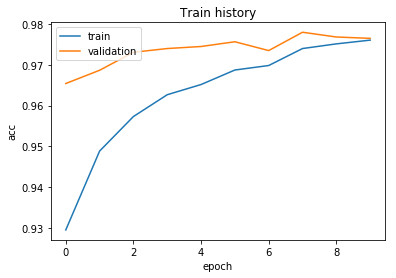

In [45]:
show_train_history(train_history_dropout,'acc','val_acc')

In [ ]:
%save mlp_handwriting_number_recognition.py 33-45